In [2]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Estimación de Métricas de Dependencia

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [4]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

Grafique las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

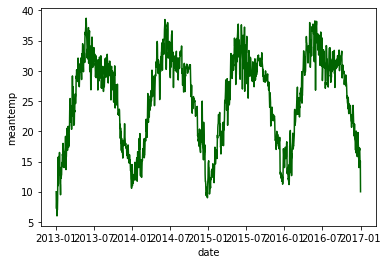

In [5]:
_ = sns.lineplot(data=df, x="date", y="meantemp", color = "darkgreen")

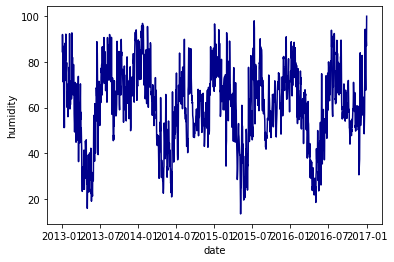

In [6]:
_ = sns.lineplot(data=df, x="date", y="humidity", color = "darkblue")

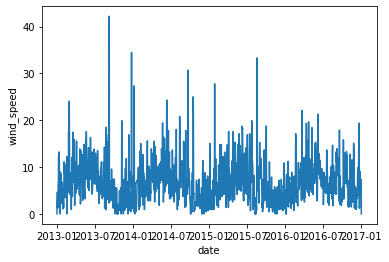

In [7]:
_ = sns.lineplot(data=df, x="date", y="wind_speed")

## Asignación 2 &#x1F625;

Grafique el histograma, calcule la media, imprimala y grafíquela en el histograma para las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

In [8]:
def histograma(column = "meantemp"):
    media = np.sum(df[column])/len(df[column])
    print("La media de ", column, " es: ", media)
    
    plt = sns.histplot(data = df, x = column)
    plt.axvline(media, color="black", ls="--", label="Media")
    plt.legend()

La media de  meantemp  es:  25.495520655761762


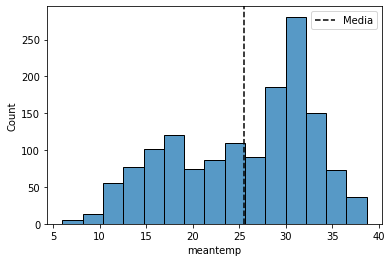

In [9]:
histograma("meantemp")

La media de  humidity  es:  60.77170158004638


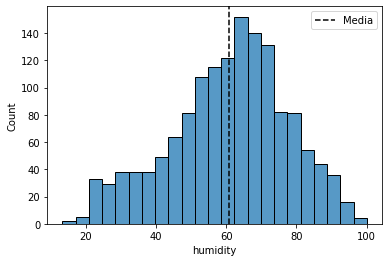

In [10]:
histograma("humidity")

La media de  wind_speed  es:  6.802208747447473


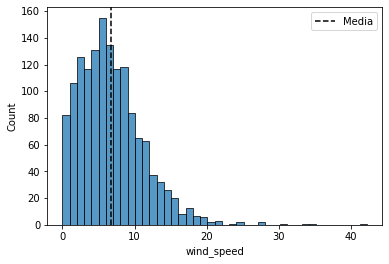

In [11]:
histograma("wind_speed")

## Asignación 3 &#x1F625;

Implemente las función de crossvariance descrita debajo

In [12]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    media_time1 = np.mean(time_series_1)
    media_time2 = np.mean(time_series_2)

    size = len(time_series_1)
    
    if type(lags) == int:
        sumxy = []
        for t in range(lags, size):
            sumxy.append((time_series_2[t-lags] - media_time2) * (time_series_1[t] - media_time1))

        return np.mean(sumxy)
    else:
        crossvariances = np.zeros(len(lags))
        for i, lag in enumerate(lags):
            sumxy = []
            for t in range(lag, size):
                sumxy.append(((time_series_2[t-lag] - media_time2) * (time_series_1[t] - media_time1)))

            crossvariances[i] =  np.mean(sumxy)
        return crossvariances
    

In [13]:
for __ts__ in ["meantemp", "humidity", "wind_speed"]:
    __cvars__ = crossvariance(df[__ts__], df[__ts__], 0)
    
    if __cvars__ is not None:
        assert np.isclose(__cvars__, df[__ts__].var(ddof=0)), "Your function has an error"

__cvars__ = crossvariance(df["humidity"], df["wind_speed"], np.arange(5).tolist())
__expected_cvars__ = [-28.58795012, -24.37189775, -21.10904889, -19.62116432, -17.42504231] 

if __cvars__ is not None:
    assert np.allclose(__cvars__, __expected_cvars__), "Your function has an error"

## Asignación 4 &#x1F921;

Implemente las función de crosscorrelation.

In [31]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
)-> float:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    Salidas:
    Retorna el valor de la crosscorrelación
    """
    
    # CÓDIGO AQUI
    if type(lags) == int:
        crossvariance_xy = crossvariance(time_series_1, time_series_2, lags)
        crossvariance_xx = crossvariance(time_series_1, time_series_2, 0)
        crossvariance_yy = crossvariance(time_series_1, time_series_2, 0)
        
        crossco = crossvariance_xy/(np.sqrt(crossvariance_xx*crossvariance_yy))
        return crossco
    else:
        crossvariances = np.zeros(len(lags))
        for i, lag in enumerate(lags):
            crossvariance_xy = crossvariance(time_series_1, time_series_2, lag)
            crossvariance_xx = crossvariance(time_series_1, time_series_2, 0)
            crossvariance_yy = crossvariance(time_series_1, time_series_2, 0)
        
            crossvariances[i] = crossvariance_xy/(np.sqrt(crossvariance_xx*crossvariance_yy))
        return crossvariances


## Asignación 5 &#x1F643;

Grafique el correlograma de la autocorrelación de la serie de tiempo __wind_speed__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlaciones de interés).

In [27]:
def standarize_dataframe(data):
    data_scaled = data
    for i in data.columns:
        media = np.sum(data[i])/len(data[i])
        sd = np.std(data[i])
        data_scaled[i] = (data[i] - media)/sd
    return data

In [32]:
def correlogram_std(name_series, lags):
    colors = ["red", "orange", "yellow"]
    stds = np.array([2, 2.5, 3])
    lags = range(0, lags)

    values = crosscorrelation(df[name_series[0]], df[name_series[1]], lags)
    stdc = (len(df[name_series[0]])**-0.5)
    print(stdc)
    stds = stds * stdc
    print(stds)
    # Correlograma
    fig, ax = plt.subplots()
    ax.stem(lags, values)

    for std, col in zip(stds, colors):
        ax.axhline(y=std, ls='--', c=col)
        ax.axhline(y=-std, ls='--', c=col)
    plt.show()

    # Correlograma entre pares
    auto_plt = sns.pairplot(df, vars=name_series, plot_kws={'color':'darkblue', 's': 5})

    for ax, serie in zip(auto_plt.axes.ravel(), name_series*len(name_series)):
        stds = np.array([2, 2.5, 3])
        stds = stds * np.std(df[serie])
        mean = np.mean(df[serie])

        for std, col in zip(stds, colors):
            ax.axvline(x=mean - std, ls='--', c=col)
            ax.axvline(x=mean + std, ls='--', c=col)
    plt.show()

0.026153289048297074
[0.05230658 0.06538322 0.07845987]


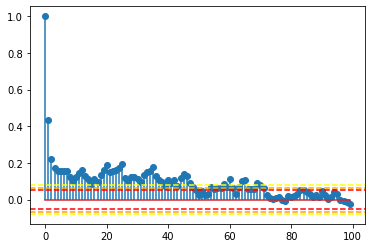

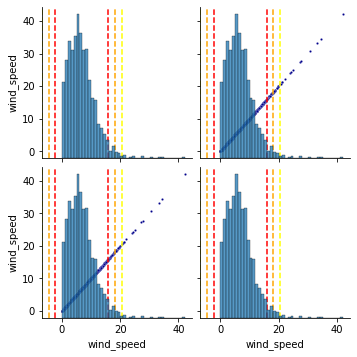

In [33]:
correlogram_std(["wind_speed", "wind_speed"], 100)

## Asignación 6 &#x1F643;

Grafique el correlograma de la correlación cruzada de la serie de tiempo __wind_speed__ y __humidity__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlación de interés).

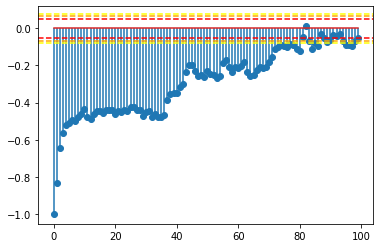

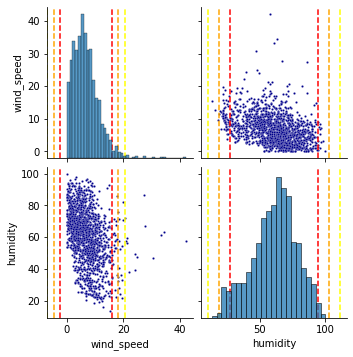

In [ ]:
correlogram_std(["wind_speed", "humidity"], 100)

## Integrity Tests

In [ ]:
import hashlib

cell_signs = [
    "2712a947826c1befb6f7d33042a804acdb7d0147"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

Something was modified...
2712a947826c1befb6f7d33042a804acdb7d0147


In [ ]:
content = _ih[-2]

program_sign = "a7f40589e9186b4b79fc2f76f1d73f2d40da0d81"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
